In [40]:
import pandas as pd

PATH: str = '../experiments'
EX_TYPES: list = ['transformer', 'linguistic', 'hybrid']
SIZES: list = ['0.010', '0.100', '1.000']
EVAL_NAME =  'metric.eval.csv'

In [41]:
results: pd.DataFrame = (
    pd.DataFrame(
        {ex: [
            pd.read_csv(f'{PATH}/{ex}/train.{s}/{EVAL_NAME}').iloc[0]['f1']
            for s in SIZES
        ] for ex in EX_TYPES
        }
    )
    .set_index(pd.Series(SIZES))
)
results

,transformer,linguistic,hybrid
0.010,0.6466,0.7102,0.7972
0.100,0.7308,0.7764,0.8318
1.000,0.7598,0.7910,0.8498


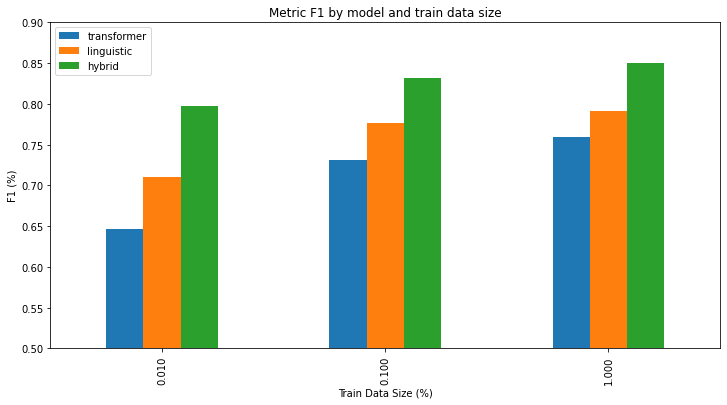

In [46]:
plot = (
    results
    .plot(
        kind='bar',
        stacked=False,
        ylim=(.5, .9),

        title='Metric F1 by model and train data size',
        xlabel='Train Data Size (%)',
        ylabel='F1 (%)',
    )
)

In [48]:
plot.get_figure().savefig('../experiments/__output.png')